<a href="https://colab.research.google.com/github/Bindhumallakunta/Machine-Learning-Based-Prediction-Model-for-Employee-Stress./blob/main/copy_of_untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving UAE-COVID-19-Vaccine-Related-Tweets_Annotated.csv to UAE-COVID-19-Vaccine-Related-Tweets_Annotated.csv


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'UAE-COVID-19-Vaccine-Related-Tweets_Annotated.csv'
data = pd.read_csv(file_path)

# Drop completely empty columns
data = data.dropna(axis=1, how='all')

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# View column names to decide the target
print("Available columns:", data.columns.tolist())


Available columns: ['Date', 'Tweet ID', 'TextBlob sentiment', 'VADER sentiment', 'EmoLex Emotion', 'Annotated Emotions']


In [45]:
print("Columns in the dataset:\n", data.columns.tolist())


Columns in the dataset:
 ['Date', 'Tweet ID', 'TextBlob sentiment', 'VADER sentiment', 'EmoLex Emotion', 'Annotated Emotions']


In [47]:
# Define features and target
X = data.drop(columns=['Annotated Emotions'])
y = data['Annotated Emotions']


In [48]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("✅ Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Random Forest Results
Accuracy: 0.5644171779141104
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.17      0.09      0.12        11
           2       0.33      0.22      0.27         9
           3       0.67      0.22      0.33         9
           4       0.36      0.56      0.43         9
           5       0.64      0.72      0.68        89
           6       0.00      0.00      0.00         2
           7       1.00      0.25      0.40         4
           8       0.42      0.59      0.49        17

    accuracy                           0.56       163
   macro avg       0.48      0.35      0.37       163
weighted avg       0.57      0.56      0.55       163

Confusion Matrix:
 [[ 7  1  0  0  0  3  0  0  2]
 [ 0  1  1  0  1  7  0  0  1]
 [ 0  0  2  0  0  7  0  0  0]
 [ 0  0  0  2  0  7  0  0  0]
 [ 0  1  0  0  5  3  0  0  0]
 [ 2  3  3  1  7 64  0  0  9]
 [ 0  0  0  0  0  1

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))


🔹 Logistic Regression
Accuracy: 0.5950920245398773
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.63      0.92      0.75        89
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.53      0.53      0.53        17

    accuracy                           0.60       163
   macro avg       0.24      0.21      0.21       163
weighted avg       0.48      0.60      0.51       163

Confusion Matrix:
 [[ 6  1  2  0  0  4  0  0  0]
 [ 0  0  2  0  0  9  0  0  0]
 [ 0  0  0  0  0  9  0  0  0]
 [ 0  0  1  0  0  5  0  0  3]
 [ 0  0  1  0  0  7  0  0  1]
 [ 0  1  1  1  0 82  0  0  4]
 [ 0  0  0  0  0  2  

In [52]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("\n🔹 Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))



🔹 Support Vector Machine
Accuracy: 0.6134969325153374
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.62      0.94      0.75        89
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.53      0.59      0.56        17

    accuracy                           0.61       163
   macro avg       0.24      0.22      0.22       163
weighted avg       0.47      0.61      0.52       163

Confusion Matrix:
 [[ 6  0  1  0  0  6  0  0  0]
 [ 0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  6  0  0  3]
 [ 0  0  0  0  0  8  0  0  1]
 [ 0  1  0  1  0 84  0  0  3]
 [ 0  0  0  0  0 

In [53]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print("\n🔹 Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))



🔹 Naive Bayes
Accuracy: 0.3006134969325153
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.00      0.00      0.00        11
           2       0.20      0.44      0.28         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.51      0.37      0.43        89
           6       0.00      0.00      0.00         2
           7       0.07      1.00      0.13         4
           8       0.29      0.12      0.17        17

    accuracy                           0.30       163
   macro avg       0.21      0.27      0.18       163
weighted avg       0.39      0.30      0.32       163

Confusion Matrix:
 [[ 6  2  0  1  0  3  0  1  0]
 [ 0  0  3  0  0  6  0  2  0]
 [ 0  0  4  0  0  5  0  0  0]
 [ 1  0  1  0  0  4  0  2  1]
 [ 0  1  1  0  0  6  0  0  1]
 [ 0  1 11  2  0 33  0 39  3]
 [ 0  0  0  0  0  1  0  1  0

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("\n🔹 Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))



🔹 Decision Tree
Accuracy: 0.5153374233128835
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.33      0.36      0.35        11
           2       0.27      0.33      0.30         9
           3       0.14      0.11      0.12         9
           4       0.10      0.11      0.11         9
           5       0.69      0.61      0.65        89
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         4
           8       0.37      0.59      0.45        17

    accuracy                           0.52       163
   macro avg       0.38      0.41      0.39       163
weighted avg       0.54      0.52      0.52       163

Confusion Matrix:
 [[ 7  1  0  0  0  3  0  0  2]
 [ 0  4  0  0  1  5  0  0  1]
 [ 0  0  3  0  1  5  0  0  0]
 [ 0  1  2  1  1  3  0  0  1]
 [ 0  2  0  0  1  4  0  0  2]
 [ 5  3  5  6  5 54  1  0 10]
 [ 0  0  0  0  0  1  0  0 

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("\n🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))



🔹 Random Forest
Accuracy: 0.5644171779141104
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.17      0.09      0.12        11
           2       0.33      0.22      0.27         9
           3       0.67      0.22      0.33         9
           4       0.36      0.56      0.43         9
           5       0.64      0.72      0.68        89
           6       0.00      0.00      0.00         2
           7       1.00      0.25      0.40         4
           8       0.42      0.59      0.49        17

    accuracy                           0.56       163
   macro avg       0.48      0.35      0.37       163
weighted avg       0.57      0.56      0.55       163

Confusion Matrix:
 [[ 7  1  0  0  0  3  0  0  2]
 [ 0  1  1  0  1  7  0  0  1]
 [ 0  0  2  0  0  7  0  0  0]
 [ 0  0  0  2  0  7  0  0  0]
 [ 0  1  0  0  5  3  0  0  0]
 [ 2  3  3  1  7 64  0  0  9]
 [ 0  0  0  0  0  1  0  0 

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print("\n🔹 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))



🔹 K-Nearest Neighbors
Accuracy: 0.49693251533742333
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48        13
           1       0.00      0.00      0.00        11
           2       0.12      0.22      0.16         9
           3       0.00      0.00      0.00         9
           4       0.20      0.22      0.21         9
           5       0.65      0.72      0.68        89
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.39      0.41      0.40        17

    accuracy                           0.50       163
   macro avg       0.21      0.23      0.22       163
weighted avg       0.45      0.50      0.47       163

Confusion Matrix:
 [[ 6  1  0  0  1  4  0  0  1]
 [ 0  0  3  0  2  5  0  0  1]
 [ 0  1  2  0  0  6  0  0  0]
 [ 1  0  0  0  0  6  0  0  2]
 [ 0  0  1  0  2  6  0  0  0]
 [ 3  5  9  2  1 64  0  0  5]
 [ 0  0  0  0  0  1

In [57]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("🔹 XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:59:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost
Accuracy: 0.5766871165644172
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.38      0.27      0.32        11
           2       0.43      0.33      0.38         9
           3       0.50      0.33      0.40         9
           4       0.43      0.33      0.38         9
           5       0.64      0.73      0.68        89
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.45      0.59      0.51        17

    accuracy                           0.58       163
   macro avg       0.38      0.35      0.36       163
weighted avg       0.55      0.58      0.56       163

Confusion Matrix:
 [[ 7  0  0  0  0  5  0  0  1]
 [ 0  3  0  0  0  8  0  0  0]
 [ 0  0  3  0  0  6  0  0  0]
 [ 0  1  0  3  1  3  0  0  1]
 [ 0  1  1  0  3  4  0  0  0]
 [ 4  3  2  3  3 65  0  0  9]
 [ 1  0  0  0  0  1  0  0  0]
 [ 

In [58]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

ada_pred = ada_model.predict(X_test)

print("\n🔹 AdaBoost")
print("Accuracy:", accuracy_score(y_test, ada_pred))
print("Classification Report:\n", classification_report(y_test, ada_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_pred))



🔹 AdaBoost
Accuracy: 0.588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.20      0.09      0.12        11
           2       0.30      0.67      0.41         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.67      0.84      0.75        89
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.50      0.53      0.51        17

    accuracy                           0.59       163
   macro avg       0.26      0.28      0.26       163
weighted avg       0.50      0.59      0.53       163

Confusion Matrix:
 [[ 5  2  1  0  0  5  0  0  0]
 [ 0  1  3  0  0  7  0  0  0]
 [ 0  0  6  0  0  3  0  0  0]
 [ 1  1  0  0  0  4  0  0  3]
 [ 0  0  0  0  0  8  0  0  1]
 [ 1  1  8  1  0 75  0  0  3]
 [ 0  0  0  0  0  2  0  0  0]
 [

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

print("\n🔹 Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))



🔹 Gradient Boosting
Accuracy: 0.6073619631901841
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.50      0.18      0.27        11
           2       0.33      0.44      0.38         9
           3       0.50      0.22      0.31         9
           4       0.20      0.11      0.14         9
           5       0.67      0.79      0.73        89
           6       0.00      0.00      0.00         2
           7       1.00      0.25      0.40         4
           8       0.56      0.59      0.57        17

    accuracy                           0.61       163
   macro avg       0.48      0.36      0.38       163
weighted avg       0.59      0.61      0.58       163

Confusion Matrix:
 [[ 9  0  0  0  1  3  0  0  0]
 [ 0  2  1  0  1  7  0  0  0]
 [ 0  0  4  0  0  5  0  0  0]
 [ 0  1  0  2  1  4  0  0  1]
 [ 0  0  1  0  1  6  0  0  1]
 [ 6  1  5  2  1 70  0  0  4]
 [ 0  0  0  0  0  2  0

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

et_pred = et_model.predict(X_test)

print("\n🔹 Extra Trees Classifier")
print("Accuracy:", accuracy_score(y_test, et_pred))
print("Classification Report:\n", classification_report(y_test, et_pred,zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, et_pred))



🔹 Extra Trees Classifier
Accuracy: 0.588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.33      0.27      0.30        11
           2       0.50      0.33      0.40         9
           3       0.29      0.22      0.25         9
           4       0.46      0.67      0.55         9
           5       0.68      0.71      0.70        89
           6       0.00      0.00      0.00         2
           7       1.00      0.50      0.67         4
           8       0.44      0.65      0.52        17

    accuracy                           0.59       163
   macro avg       0.49      0.42      0.44       163
weighted avg       0.59      0.59      0.58       163

Confusion Matrix:
 [[ 6  1  0  0  1  3  0  0  2]
 [ 0  3  0  0  1  6  0  0  1]
 [ 0  0  3  0  1  5  0  0  0]
 [ 0  0  0  2  0  6  0  0  1]
 [ 0  1  0  0  6  2  0  0  0]
 [ 3  4  3  3  4 63  0  0  9]
 [ 0  0  0  0  0  

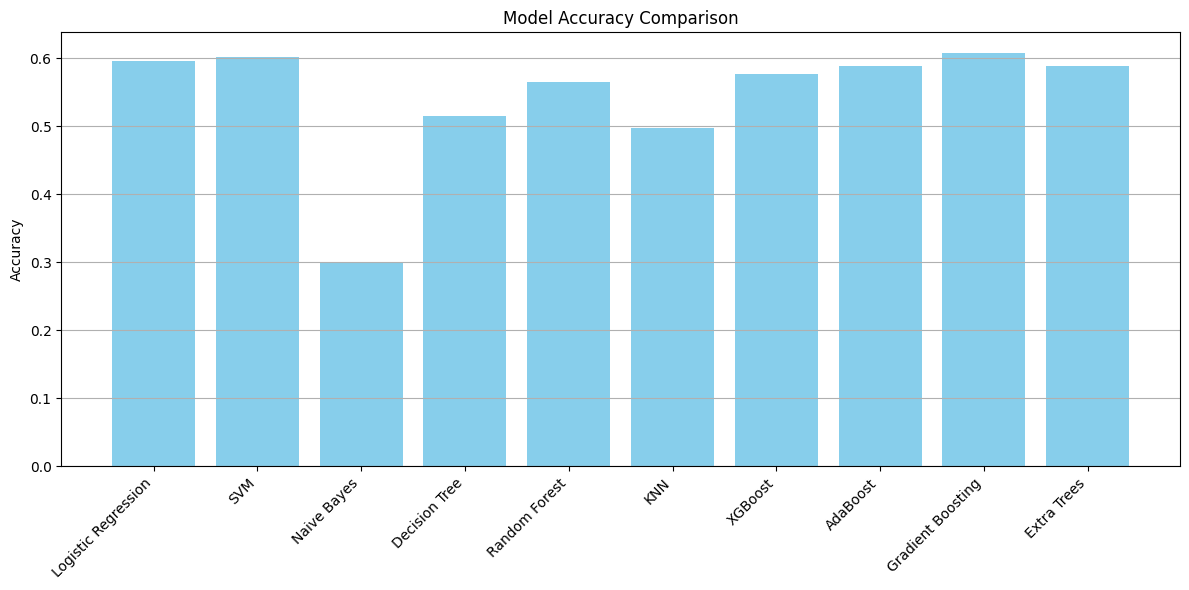

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train all models and store predictions
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Store accuracies
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

# Plot accuracies
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate (optional)
print("🔹 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


🔹 Decision Tree
Accuracy: 0.5153374233128835
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.33      0.36      0.35        11
           2       0.27      0.33      0.30         9
           3       0.14      0.11      0.12         9
           4       0.10      0.11      0.11         9
           5       0.69      0.61      0.65        89
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         4
           8       0.37      0.59      0.45        17

    accuracy                           0.52       163
   macro avg       0.38      0.41      0.39       163
weighted avg       0.54      0.52      0.52       163

Confusion Matrix:
 [[ 7  1  0  0  0  3  0  0  2]
 [ 0  4  0  0  1  5  0  0  1]
 [ 0  0  3  0  1  5  0  0  0]
 [ 0  1  2  1  1  3  0  0  1]
 [ 0  2  0  0  1  4  0  0  2]
 [ 5  3  5  6  5 54  1  0 10]
 [ 0  0  0  0  0  1  0  0  

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)


In [75]:
from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test)


In [77]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)


In [79]:
from sklearn.ensemble import ExtraTreesClassifier

# Train the Extra Trees model
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Predictions
y_pred_et = et_model.predict(X_test)


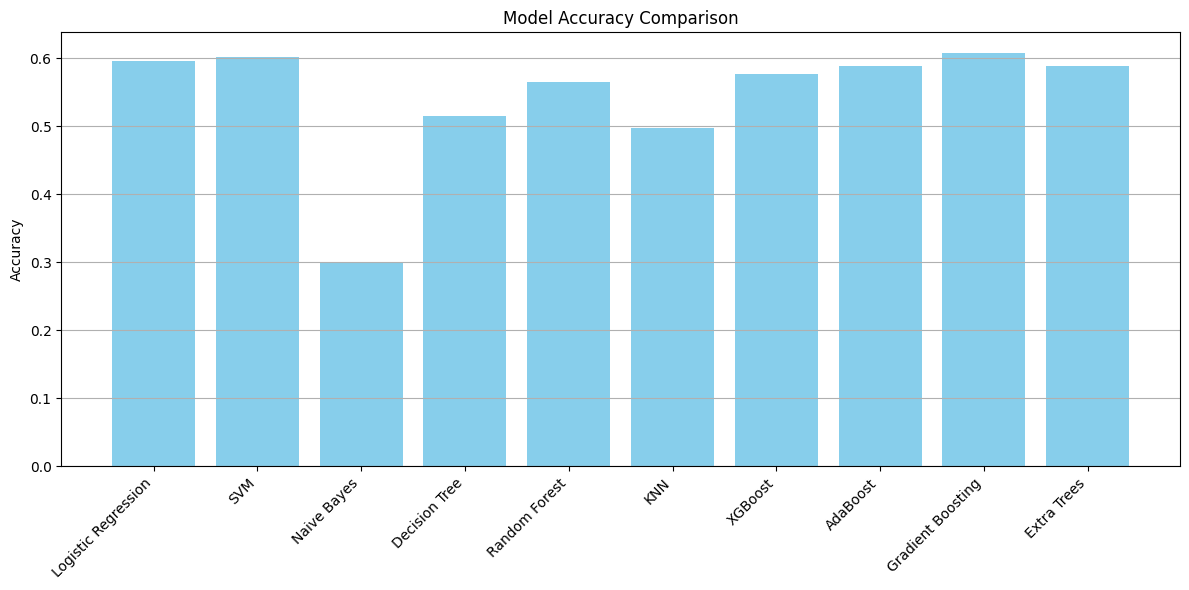

In [80]:
import matplotlib.pyplot as plt

model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "Extra Trees": accuracy_score(y_test, y_pred_et),
}

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [82]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation for Random Forest
scores = cross_val_score(rf_model, X, y, cv=3)
print("Cross-Validation Accuracy (Random Forest):", scores.mean())


Cross-Validation Accuracy (Random Forest): 0.325736198538456


In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
best_model = grid_search.best_estimator_


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [85]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    max_depth=10,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)


In [86]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_best_rf, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.33      0.18      0.24        11
           2       0.33      0.11      0.17         9
           3       0.67      0.22      0.33         9
           4       0.67      0.22      0.33         9
           5       0.65      0.90      0.75        89
           6       0.00      0.00      0.00         2
           7       1.00      0.25      0.40         4
           8       0.53      0.53      0.53        17

    accuracy                           0.63       163
   macro avg       0.57      0.32      0.38       163
weighted avg       0.63      0.63      0.59       163

Confusion Matrix:
 [[ 6  1  0  0  0  6  0  0  0]
 [ 0  2  1  0  0  8  0  0  0]
 [ 0  0  1  0  0  8  0  0  0]
 [ 0  0  0  2  0  5  0  0  2]
 [ 0  1  0  0  2  6  0  0  0]
 [ 0  2  1  1  0 80  0  0  5]
 [ 0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  1  1  0  1  1]
 [ 0  0  0  

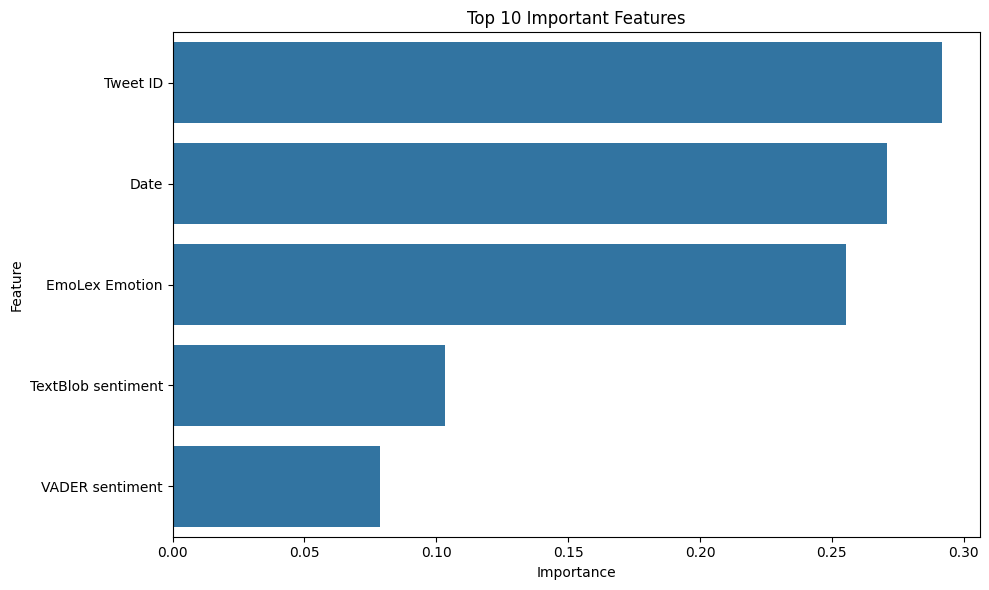

In [87]:
importances = best_rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()



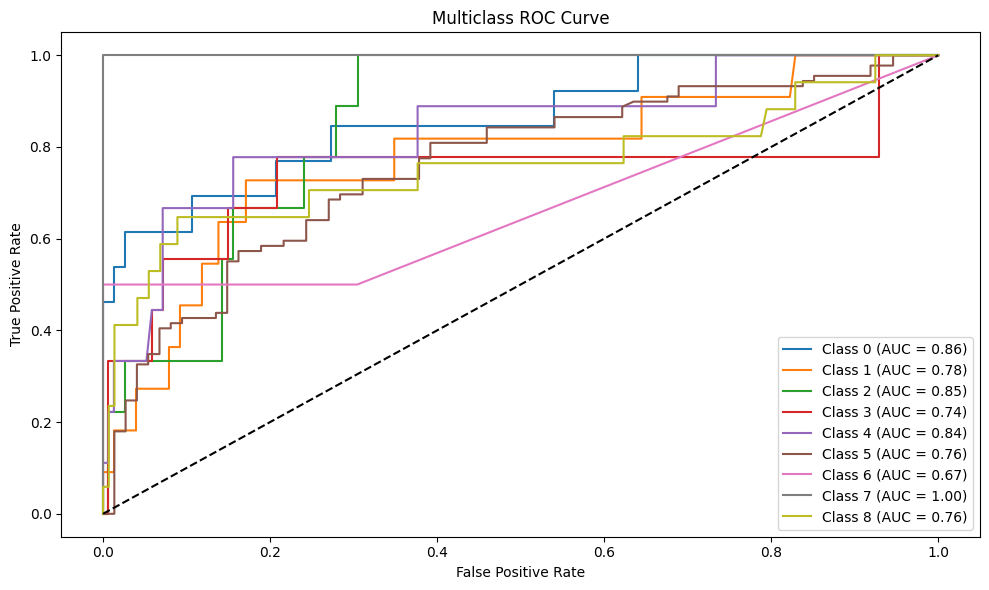

In [91]:
import numpy as np

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Get the probabilities
y_score = best_rf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
